In [ ]:
from sklearn import datasets
X, y = datasets.load_iris(as_frame=True, return_X_y=True)

In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: target
Non-Null Count  Dtype
--------------  -----
150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


In [ ]:
# prompt: Train the model Using Kmeans Clustering by setting the parameter as following:
#    "init": "random",    "n_init": 50,    "max_iter": 500,    "random_state": 10

from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_init=50, max_iter=500, random_state=10)
kmeans.fit(X)


KMeans(init='random', max_iter=500, n_init=50, random_state=10)

In [ ]:
# prompt: Which feature pair has the highest correlation cofficient value.

X.corr()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [ ]:
# prompt: Enter the value of the ' inertia_' score Keeping k=5.

kmeans = KMeans(n_clusters=5, init="random", n_init=50, max_iter=500, random_state=10)
kmeans.fit(X)
print(kmeans.inertia_)


46.44618205128204


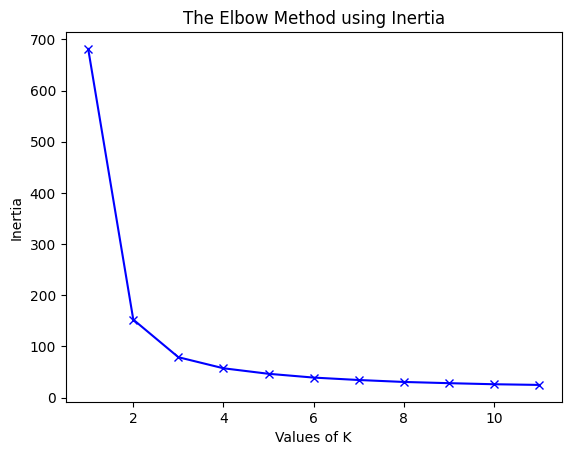

Elbow is formed at k=3


In [ ]:
# prompt: Plot the elbow chart for the given data by taking k=1 to k=12. At which k value elbow is formed?

import matplotlib.pyplot as plt
inertia = []
K = range(1,12)
for k in K:
    kmeans = KMeans(n_clusters=k, init="random", n_init=50, max_iter=500, random_state=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()
print("Elbow is formed at k=3")


In [ ]:
inertia

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.44618205128204,
 39.03998724608725,
 34.305815295815314,
 30.507862887112903,
 28.115515254353507,
 26.030137757932394,
 24.699769734143317]

In [ ]:
# prompt: Train the model using Agglomerative Clustering by setting the parameter as following
# n_clusters=3,affinity='euclidean', linkage='ward'

from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')
clustering.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [ ]:
X.iloc[-1]

,149
sepal length (cm),5.9
sepal width (cm),3.0
petal length (cm),5.1
petal width (cm),1.8


In [ ]:
clustering.labels_[-1]

0

In [ ]:
clustering.labels_[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
clustering.n_leaves_

150

In [ ]:
# prompt: load diabetes.csv

import pandas as pd
df2 = pd.read_csv('diabetes.csv')

In [ ]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
y=df2['Outcome']
X=df2.drop('Outcome',axis=1)

In [ ]:
X.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


In [ ]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# prompt: split the dataset into training and test dataset in 80:20 proportion with "random_state": 1

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)


In [ ]:
# prompt: Create a pipeline with scaler as StandardScaler and classifier as MLPClassifier.
# Classifier should have the following properties:
# Classifier should have three hidden layers with 10 neurons each.
# set activation='relu', solver='sgd', alpha= 1e-4, learning_rate_init= 0.2 ,max_iter=500, random_state=1

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver='sgd', alpha= 1e-4, learning_rate_init= 0.2 ,max_iter=500, random_state=1)
pipe = make_pipeline(StandardScaler(), mlp_clf)


In [ ]:
# prompt: What will be the mean accuracy of the model on the training data?

pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))


0.7915309446254072


In [ ]:
# prompt: What will be the mean accuracy of the model on the test data?

print(pipe.score(X_test, y_test))


0.7662337662337663


In [ ]:
pipe[-1].out_activation_

'logistic'

In [ ]:
# prompt: How many weights (excluding intercepts) between input layer and first hidden layer were learnt by the classifier?

# Number of features in the input layer
num_input_features = X_train.shape[1]

# Number of neurons in the first hidden layer
num_first_hidden_neurons = pipe[-1].hidden_layer_sizes[0]

# Number of weights between input and first hidden layer
num_weights = num_input_features * num_first_hidden_neurons

print("Number of weights between input and first hidden layer:", num_weights)


Number of weights between input and first hidden layer: 80


In [ ]:
num_first_hidden_neurons

10

In [ ]:
num_input_features

8